In [2]:
%config IPCompleter.greedy=True

In [18]:
import numpy as np

In [3]:
import tensorflow as tf
import os

In [15]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
from tensorflow.keras.preprocessing import image

In [5]:
data_path = # path to your data set

In [36]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.95):
            print("\nReached 95.0% accuracy so cancelling training!")
            self.model.stop_training = True


In [6]:
def create_model():
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])
    
    model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

    return model3#

In [43]:
data_set = ImageDataGenerator(rescale= 1/255,       # ImageGenerator with augmentation
                              rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

data_gen = data_set.flow_from_directory(
        data_path,  
        target_size=(150, 150),  
        batch_size=128,
        class_mode='binary')


Found 1027 images belonging to 2 classes.


In [47]:
model =  create_model()

In [37]:
callbacks = myCallback()

In [48]:
history = model.fit(data_gen,epochs = 8,steps_per_epoch = 8,callbacks = [callbacks], verbose = 1)

Epoch 1/8
8/8 [==============================] - 16s 2s/step - loss: 0.9564 - acc: 0.5206
Epoch 2/8
8/8 [==============================] - 15s 2s/step - loss: 0.7226 - acc: 0.6085
Epoch 3/8
8/8 [==============================] - 16s 2s/step - loss: 0.5946 - acc: 0.6552
Epoch 4/8
8/8 [==============================] - 16s 2s/step - loss: 0.6064 - acc: 0.6607
Epoch 5/8
8/8 [==============================] - 16s 2s/step - loss: 0.5335 - acc: 0.7141
Epoch 6/8
8/8 [==============================] - 16s 2s/step - loss: 0.4850 - acc: 0.7575
Epoch 7/8
8/8 [==============================] - 16s 2s/step - loss: 0.5484 - acc: 0.7119
Epoch 8/8
8/8 [==============================] - 15s 2s/step - loss: 0.4749 - acc: 0.7642


In [39]:
test_dir =  # path to you test dir
test_list = os.listdir(test_dir)
print(test_list)

['beautiful-1274056_960_720.webp', 'trendy-ladies-tops-500x500.jpg', '18ea0a314a497ff12f62bb1152f83b38.jpg', 'download.jpeg', 'best-multivitamins-for-men-1296x728-feature.jpg', 'download (1).jpeg', 'images.jpeg', '1c265b568fec07eb220ab991681e1eae5643fd4191e6e3256872e12b4ffd.jpeg']


In [45]:
for fl in test_list:
    path =  os.path.join(test_dir, fl)
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fl + " is a human")
    else:
        print(fl + " is a horse")
 

[1.]
beautiful-1274056_960_720.webp is a human
[1.]
trendy-ladies-tops-500x500.jpg is a human
[0.]
18ea0a314a497ff12f62bb1152f83b38.jpg is a horse
[0.]
download.jpeg is a horse
[1.]
best-multivitamins-for-men-1296x728-feature.jpg is a human
[1.]
download (1).jpeg is a human
[0.]
images.jpeg is a horse
[0.]
1c265b568fec07eb220ab991681e1eae5643fd4191e6e3256872e12b4ffd.jpeg is a horse


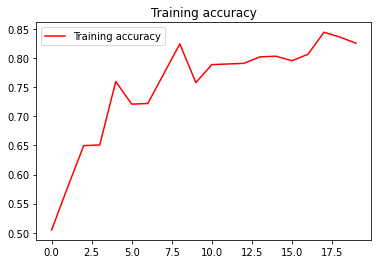

<Figure size 432x288 with 0 Axes>

In [46]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()